In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e01ccc0>,
      dtype=object)

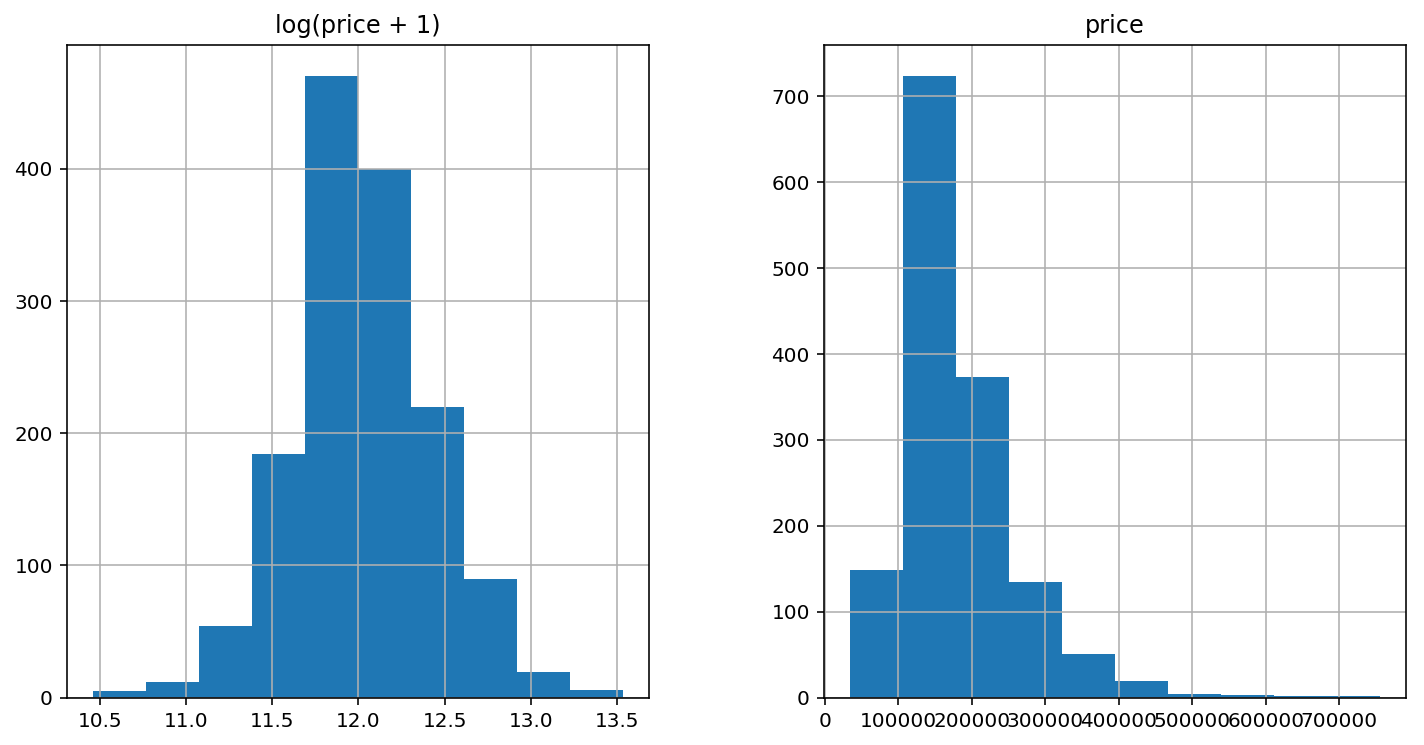

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [6]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [7]:
train = pd.get_dummies(train)

In [8]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [9]:
#filling NA's with the mean of the column:
train = train.fillna(train.mean())

In [10]:
train.isnull().sum().sort_values(ascending=False).head(20)

SaleCondition_Partial    0
Neighborhood_Edwards     0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
Condition2_RRAn          0
Condition2_RRNn          0
Condition1_Feedr         0
Condition1_Artery        0
Neighborhood_Veenker     0
dtype: int64

## Model

In [11]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [12]:
features = train.drop('SalePrice',axis=1)
labels = train.SalePrice

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [14]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,255,20,70.000000,8400,5,6,1957,1957,0.000000,922,...,0,0,0,1,0,0,0,0,1,0
1066,1067,60,59.000000,7837,6,7,1993,1994,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
638,639,30,67.000000,8777,5,7,1910,1950,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
799,800,50,60.000000,7200,5,7,1937,1950,252.000000,569,...,0,0,0,1,0,0,0,0,1,0
380,381,50,50.000000,5000,5,6,1924,1950,0.000000,218,...,0,0,0,1,0,0,0,0,1,0
303,304,20,70.000000,9800,5,7,1972,1972,0.000000,894,...,0,0,0,1,1,0,0,0,0,0
86,87,60,122.000000,11911,6,5,2005,2005,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
1385,1386,50,40.000000,5436,4,8,1922,2007,0.000000,735,...,0,0,0,1,0,0,0,0,1,0
265,266,20,78.000000,12090,6,6,1981,1981,210.000000,588,...,0,0,0,1,0,0,0,0,1,0
793,794,20,76.000000,9158,8,5,2007,2007,140.000000,0,...,0,1,0,0,0,0,0,0,0,1


In [15]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28980933497223305, tolerance: 0.011877230533151777
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022220626780500297, tolerance: 0.011877230533151777
  tol, rng, random, positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/s

In [16]:
model_lasso

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv='warn', eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [17]:
y_pred = model_lasso.predict(X_test)

In [18]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
614     11.231901
218     12.649158
1160    11.891369
649     11.344519
887     11.816734
576     11.884496
1252    11.775297
1061    11.302217
567     12.273736
1108    12.106258
1113    11.809327
168     12.119975
1102    11.813037
1120    11.681832
67      12.328295
1040    11.951187
453     12.254868
670     12.063939
1094    11.767575
192     12.165256
123     11.944065
415     12.106998
277     11.856522
433     12.106258
1317    12.249616
          ...    
233     11.761355
426     12.524530
196     12.650351
1226    12.273736
81      11.941462
1368    11.877576
1125    11.652696
111     12.100718
1243    13.049795
744     12.100718
937     12.441149
344     11.350418
1232    11.530775
865     11.908347
1088    11.831386
350     12.670002
588     11.870607
1427    11.849405
948     12.167857
1449    11.429555
989     12.190964
677     11.603689
478     12.601491
1271    12.132162
1410    12

In [19]:
df_temp = pd.DataFrame(y_test)
df_temp['Predicted'] = y_pred

df_temp

,SalePrice,Predicted
892,11.947956,11.953398
1105,12.691584,12.677968
413,11.652696,11.562298
522,11.976666,11.955136
1036,12.661917,12.654426
614,11.231901,11.360673
218,12.649158,12.457414
1160,11.891369,11.862792
649,11.344519,11.306977
887,11.816734,11.895450


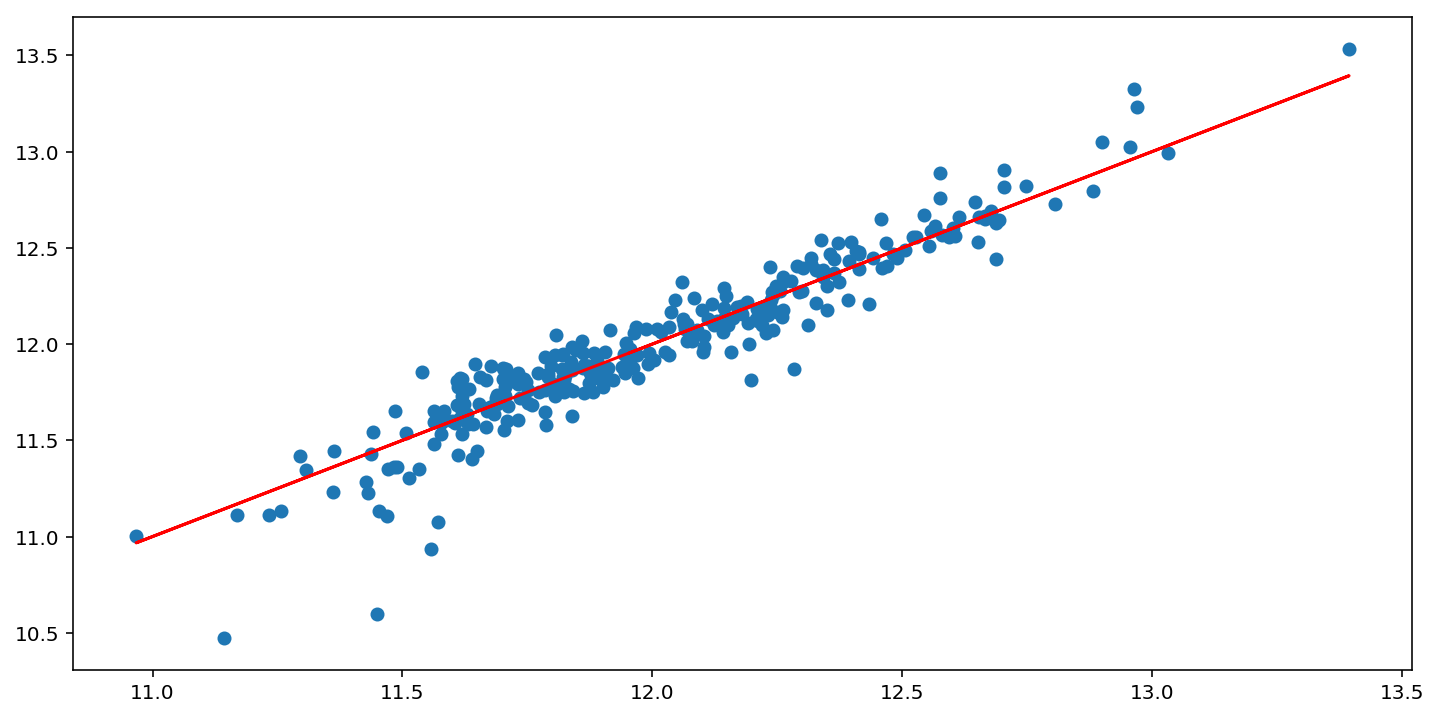

In [20]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred, y_pred, c='red')

In [21]:
# XGBoost

import xgboost as xgb

In [22]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:32:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [23]:
y_pred = model_xgb.predict(X_test)

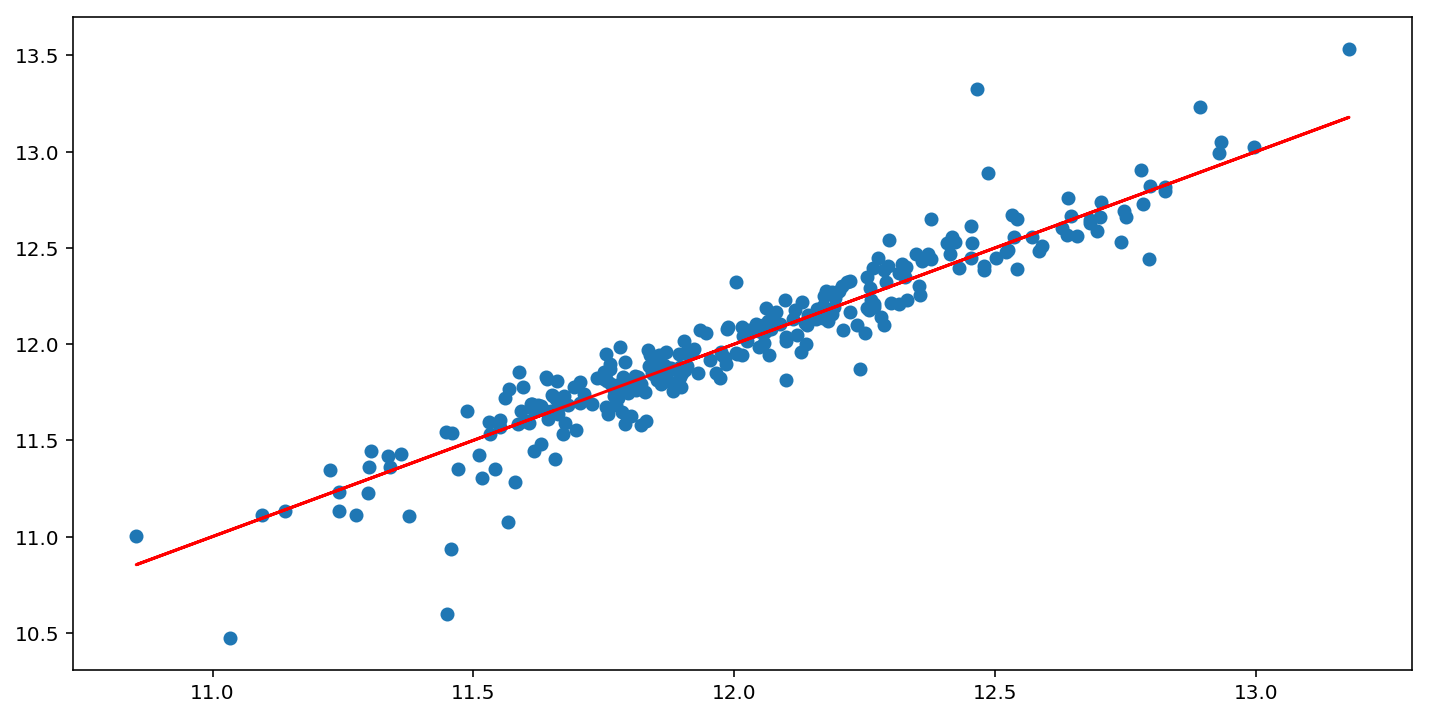

In [24]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred, y_pred, c='red')